In [1]:
import pandas as pd
import numpy as np
uclap=pd.read_excel(r'C:\Users\Win 8.1\Documents\data.xlsx')
uclap.head(10)

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11
5,YRKFO,4,2018-03-02,2018-03-05,A,13
6,JSFWY,5,2018-01-06,2018-01-07,C,14
7,GTLXK,6,2018-07-18,2018-07-21,B,13
8,BGNZX,7,2017-12-07,2017-12-12,D,16
9,TDVFU,8,2018-11-29,2018-11-29,C,10


In [2]:
uclap['Booking_Period']=uclap.Date_of_Booking.apply(lambda x:x.strftime('%Y-%m'))
uclap.head(10)

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Booking_Period
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018-05
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018-09
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018-11
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018-04
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018-08
5,YRKFO,4,2018-03-02,2018-03-05,A,13,2018-03
6,JSFWY,5,2018-01-06,2018-01-07,C,14,2018-01
7,GTLXK,6,2018-07-18,2018-07-21,B,13,2018-07
8,BGNZX,7,2017-12-07,2017-12-12,D,16,2017-12
9,TDVFU,8,2018-11-29,2018-11-29,C,10,2018-11


In [6]:
uclap.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
uclap.head()

,Transaction_ID,Profile_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot_of_Booking_(Hour_of_the_Day),Booking_Period
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018-05
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018-09
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018-11
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018-04
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018-08


In [7]:
uclap.set_index('Profile_ID', inplace=True)

uclap['CohortGroup'] = uclap.groupby(level=0)['Date_of_Booking'].min().apply(lambda x: x.strftime('%Y-%m'))
uclap.reset_index(inplace=True)
uclap.head()

,Profile_ID,Transaction_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot_of_Booking_(Hour_of_the_Day),Booking_Period,CohortGroup
0,1,BBCHH,2018-05-20,2018-05-21,D,14,2018-05,2018-05
1,1,CHWFD,2018-09-23,2018-09-23,C,8,2018-09,2018-05
2,2,DYDMF,2018-11-10,2018-11-13,C,11,2018-11,2018-11
3,3,EZYSA,2018-04-12,2018-04-16,B,8,2018-04,2018-04
4,3,HWAKX,2018-08-05,2018-08-06,B,11,2018-08,2018-04


In [8]:
datagrouped = uclap.groupby(['CohortGroup', 'Booking_Period'])

cohorts = datagrouped.agg({'Profile_ID': pd.Series.nunique,
                       'Transaction_ID': pd.Series.nunique,
                          })

cohorts.rename(columns={'Profile_ID': 'TotalUsers',
                        'Transaction_ID': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders
CohortGroup Booking_Period                         
2017-12     2017-12               2424         2761
            2018-01                432          637
            2018-02                374          529
            2018-03                412          619
            2018-04                429          601

In [10]:
def cohort_period(uclap):
    
    uclap['CohortPeriod'] = np.arange(len(uclap)) + 1
    return uclap

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()


TotalUsers  TotalOrders  CohortPeriod
CohortGroup Booking_Period                                       
2017-12     2017-12               2424         2761             1
            2018-01                432          637             2
            2018-02                374          529             3
            2018-03                412          619             4
            2018-04                429          601             5

In [11]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2017-12    2424
2018-01    1892
2018-02    1549
2018-03    1490
2018-04    1346
Name: TotalUsers, dtype: int64

In [12]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2017-12      1               2424
             2                432
             3                374
             4                412
             5                429
Name: TotalUsers, dtype: int64

In [13]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
CohortPeriod,,,,,,,,,,,,
1,2424.0,1892.0,1549.0,1490.0,1346.0,1264.0,1273.0,1208.0,1120.0,1020.0,1110.0,1015.0
2,432.0,192.0,136.0,97.0,73.0,56.0,59.0,44.0,38.0,38.0,40.0,NaN
3,374.0,210.0,118.0,101.0,74.0,52.0,55.0,53.0,48.0,42.0,NaN,NaN
4,412.0,198.0,132.0,109.0,81.0,74.0,65.0,56.0,38.0,NaN,NaN,NaN
5,429.0,210.0,120.0,101.0,93.0,61.0,68.0,59.0,NaN,NaN,NaN,NaN


In [14]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
CohortPeriod,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.178218,0.101480,0.087799,0.065101,0.054235,0.044304,0.046347,0.036424,0.033929,0.037255,0.036036,NaN
3,0.154290,0.110994,0.076178,0.067785,0.054978,0.041139,0.043205,0.043874,0.042857,0.041176,NaN,NaN
4,0.169967,0.104651,0.085216,0.073154,0.060178,0.058544,0.051060,0.046358,0.033929,NaN,NaN,NaN
5,0.176980,0.110994,0.077469,0.067785,0.069094,0.048259,0.053417,0.048841,NaN,NaN,NaN,NaN
6,0.168729,0.107294,0.083280,0.081208,0.061664,0.049051,0.043991,NaN,NaN,NaN,NaN,NaN
7,0.167492,0.117865,0.074887,0.079866,0.061664,0.048259,NaN,NaN,NaN,NaN,NaN,NaN
8,0.180281,0.097780,0.092963,0.077852,0.062407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.173267,0.105180,0.089735,0.073826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#BAR PLOT 

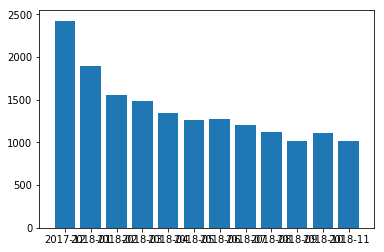

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
x= ['2017-12', '2018-01', '2018-02', '2018-03' ,'2018-04' ,'2018-05', '2018-06', '2018-07', '2018-08', '2018-09' ,'2018-10', '2018-11']
y=[2424, 1892, 1549, 1490, 1346, 1264, 1273, 1208, 1120, 1020, 1110, 1015]

plt.bar(x, y)
plt.show()


In [28]:
uclap['Booking_Time'] = uclap.Date_of_Booking.apply(lambda x: x.strftime('%Y-%m-%d'))
uclap.head()



,Profile_ID,Transaction_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot_of_Booking_(Hour_of_the_Day),Booking_Period,CohortGroup,Booking_Time,CohortGroup1,CohortPeriod
0,1,BBCHH,2018-05-20,2018-05-21,D,14,2018-05,2018-05,2018-05-20,2018-05-20,1
1,1,CHWFD,2018-09-23,2018-09-23,C,8,2018-09,2018-05,2018-09-23,2018-05-20,2
2,2,DYDMF,2018-11-10,2018-11-13,C,11,2018-11,2018-11,2018-11-10,2018-11-10,3
3,3,EZYSA,2018-04-12,2018-04-16,B,8,2018-04,2018-04,2018-04-12,2018-04-12,4
4,3,HWAKX,2018-08-05,2018-08-06,B,11,2018-08,2018-04,2018-08-05,2018-04-12,5


In [38]:
uclap.groupby(['Profile_ID','Booking_Period','Booking_Period'])
uclap.head()

,Profile_ID,Transaction_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot_of_Booking_(Hour_of_the_Day),Booking_Period,CohortGroup,Booking_Time,CohortGroup1,CohortPeriod
0,1,BBCHH,2018-05-20,2018-05-21,D,14,2018-05,2018-05,2018-05-20,2018-05-20,1
1,1,CHWFD,2018-09-23,2018-09-23,C,8,2018-09,2018-05,2018-09-23,2018-05-20,2
2,2,DYDMF,2018-11-10,2018-11-13,C,11,2018-11,2018-11,2018-11-10,2018-11-10,3
3,3,EZYSA,2018-04-12,2018-04-16,B,8,2018-04,2018-04,2018-04-12,2018-04-12,4
4,3,HWAKX,2018-08-05,2018-08-06,B,11,2018-08,2018-04,2018-08-05,2018-04-12,5


In [218]:
uclapgroup=uclap.groupby('Profile_ID').agg({'Date_of_Booking': lambda date: ((date.max() - date.min()).days)<90,
                                            'Transaction_ID': lambda num: len(num)
                                         })

uclapgroup.head()

,Date_of_Booking,Transaction_ID
Profile_ID,,
1,False,2
2,True,1
3,False,2
4,True,1
5,True,1


In [89]:
uclapgrouptrue=uclapgroup.loc[uclapgroup['Date_of_Booking'] == True]
uclapgrouptrue.head()

,Date_of_Booking,Transaction_ID
Profile_ID,,
2,True,1
4,True,1
5,True,1
6,True,1
7,True,1


In [94]:
uclapgrouptrue.columns=['num_days','number_orders']
uclapgrouptrue.head()


,num_days,number_orders
Profile_ID,,
2,True,1
4,True,1
5,True,1
6,True,1
7,True,1


In [ ]:
plt.hist(uclapgrouptrue)
plt.title('Frequency Distribution')
plt.xlabel('Profile_ID')
plt.ylabel('number_orders')


In [96]:
repeat_rate=uclapgrouptrue[uclapgrouptrue.number_orders > 1].shape[0]/uclapgroup.shape[0]
print(repeat_rate)

0.06588474657411286


In [172]:
uclap.count_column=uclap.groupby(['Profile_ID','Booking_Period']).Profile_ID.transform('count')
uclap.head()

,Profile_ID,Transaction_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot_of_Booking_(Hour_of_the_Day),Booking_Period,CohortGroup,Booking_Time,CohortGroup1,CohortPeriod
0,1,BBCHH,2018-05-20,2018-05-21,D,14,2018-05,2018-05,2018-05-20,2018-05-20,1
1,1,CHWFD,2018-09-23,2018-09-23,C,8,2018-09,2018-05,2018-09-23,2018-05-20,2
2,2,DYDMF,2018-11-10,2018-11-13,C,11,2018-11,2018-11,2018-11-10,2018-11-10,3
3,3,EZYSA,2018-04-12,2018-04-16,B,8,2018-04,2018-04,2018-04-12,2018-04-12,4
4,3,HWAKX,2018-08-05,2018-08-06,B,11,2018-08,2018-04,2018-08-05,2018-04-12,5


In [204]:
uclapgroup1=uclap.groupby(['Profile_ID','Booking_Period']).agg({'Date_of_Booking': lambda date: ((date.max() - date.min()).days)<=30,
                        
                                             'Transaction_ID': lambda num: len(num),
                                            })
uclapgroup1.head()


Date_of_Booking  Transaction_ID
Profile_ID Booking_Period                                 
1          2018-05                    True               1
           2018-09                    True               1
2          2018-11                    True               1
3          2018-04                    True               1
           2018-08                    True               1

In [209]:
type('Booking_Period')

str

In [142]:
purchase_frequency=sum(uclapgroup1['Transaction_ID'])/uclapgroup1.shape[0]
print(purchase_frequency)

0.28071330261504396
